## Figures - double well

In [4]:
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt

In [5]:
#set bigger font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16

plt.rc('font', size=SMALL_SIZE)        # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)   # fontsize of the figure title

In [6]:
#set palette
import fessa #https://github.com/luigibonati/fessa-color-palette
plt.set_cmap('fessa')

<Figure size 432x288 with 0 Axes>

## model potential

In [7]:
def DoubleWell2D(x, y, theta=-0.3*np.pi/2, scale=2):
    if theta == 0:
        ene = x**4 + y**4 - 2 * x**2 - 4 * y**2 + 2 * x * y + 0.8 * x + 0.1 * y
        shift = 9.28
        return scale * (ene + shift)
    else:
        c=np.cos(theta)
        s=np.sin(theta) 
        return DoubleWell2D(c*x-s*y, s*x+c*y, theta=0, scale=scale)

def ExtraDims(x, y, scale=15):
    return scale * 0.5 * (x**2 + y**2)

In [8]:
nbins = 101
x_bins = np.linspace(-3, 3, nbins)
y_bins = x_bins
X, Y = np.meshgrid(x_bins,y_bins)

FES = np.zeros(len(x_bins))
for i,x in enumerate(x_bins):
    FES[i] = -np.logaddexp.reduce(-np.array([DoubleWell2D(x,y) for y in y_bins]))
FES -= min(FES)

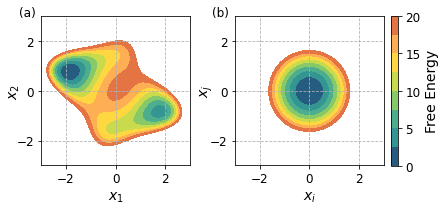

In [9]:
levels = np.linspace(0,20,9)

fig = plt.figure(figsize=(6.4, 4.8))
gs = fig.add_gridspec(1, 2, wspace=0.3)
axs = gs.subplots()

ax = axs[0]
ct = ax.contourf(X, Y, DoubleWell2D(X,Y), levels=levels)
ax.set_box_aspect(1)
ax.set_xlim(x_bins[0], x_bins[-1])
ax.set_ylim(y_bins[0], y_bins[-1])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', labelpad=-5)
ax.grid(linestyle='dashed')
ax.text(-0.15, 1.0, '(a)', transform=ax.transAxes, fontdict={'size': 12})

ax = axs[1]
ct = ax.contourf(X, Y, ExtraDims(X,Y), levels=levels)
ax.set_box_aspect(1)
ax.set_xlim(x_bins[0], x_bins[-1])
ax.set_ylim(y_bins[0], y_bins[-1])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel('$x_i$')
ax.set_ylabel('$x_j$', labelpad=-5)
ax.grid(linestyle='dashed')
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontdict={'size': 12})

cb = plt.colorbar(ct, ticks=levels[::2], ax=axs, pad=0.02, fraction=0.021)
cb.set_label('Free Energy')

plt.savefig('DoubleWell-potential.pdf', bbox_inches='tight')
plt.show()

## sampling efficiency

In [10]:
#data taken from many simulations, but the numbers are not averages, just output of a representative run
extra_point = True

dims = [2**i for i in range(2, 2*6+1, 2)]
dims = np.array([2, *dims])
nrep_REX = np.array([2, 3, 4, 6, 10, 20, 40])
eff_REX = np.array([18.6, 45.2, 20, 9.6, 5.9, 5.5, 5.0])/100
eff_LREX = np.array([22, 20.93, 20.99, 20.80, 19.95, 17.73, 12.02])/100
eff_OPES = np.array([0.6, 0.57, 0.388, 0.2497, 0.1455, 0.076111, 0.0390613])
xrange = np.linspace(2, 5000, 100)

if extra_point:
    dims = np.append(dims, 2**14)
    nrep_REX = np.append(nrep_REX, 78) #estrapolated
    eff_REX = np.append(eff_REX, 5/100) #estrapolated
    eff_LREX = np.append(eff_LREX, 2.67/100) #measured
    eff_OPES = np.append(eff_OPES, 0.0195) #estrapolated
    xrange = np.linspace(2, 20_000, 100)
dims

array([    2,     4,    16,    64,   256,  1024,  4096, 16384])

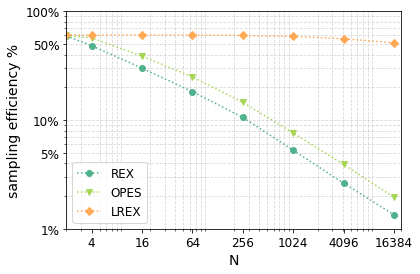

In [11]:
plt.plot(dims, 100*(1+eff_REX)/nrep_REX, 'o:', c='fessa2', label='REX')
plt.plot(dims, 100*eff_OPES, 'v:', c='fessa3', label='OPES')
plt.plot(dims, 100*(1+eff_LREX)/2, 'D:', c='fessa5', label='LREX')

plt.xlabel('N')
plt.xlim(xrange[0], xrange[-1])
plt.xscale('log')
plt.xticks(dims[1:], dims[1:])

plt.ylabel('sampling efficiency %')
plt.ylim(1,100)
plt.yscale('log')
plt.yticks([1, 5, 10, 50, 100], ['1%', '5%', '10%', '50%', '100%'])

plt.grid(axis='x', which='minor', linestyle='dashed', alpha=0.5)
plt.grid(axis='y', which='both', linestyle='dashed', alpha=0.5)
plt.legend()
plt.savefig('DoubleWell-efficiency.pdf', bbox_inches='tight')
plt.show()

## energy distribution

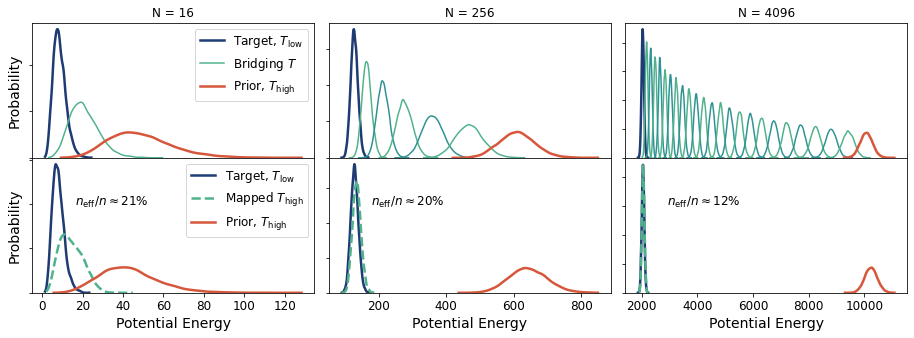

In [13]:
s_eff = [21, 20, 12]

fig = plt.figure(figsize=(2*6.4, 4.8))
gs = fig.add_gridspec(2, 3, hspace=0)
axs = gs.subplots(sharex=False, sharey=False)
for i,dim in enumerate([2**4, 2**8, 2**12]):
    
    ax = axs[0,i]
    ax.set_title(f'N = {dim}')
    if i == 0:
        ax.set_ylabel('Probability')
    ene = np.load(f'../dw/DoubleWell{dim}-MDenergies.npy')
    grid = np.linspace(ene[0].min(), ene[0].max(), 100)
    ax.plot(grid, gaussian_kde(ene[0]).pdf(grid), color=f'fessa0', label='Target, $T_{\mathrm{low}}$', lw=2.5)
    grid = np.linspace(ene[1].min(), ene[1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[1]).pdf(grid), color=f'fessa2', label='Bridging $T$', lw=1.5, ls='-')
    for j in range(2, len(ene)-1):
        grid = np.linspace(ene[j].min(), ene[j].max(), 100)
        color = 'fessa1' if j % 2 == 0 else 'fessa2'
        ax.plot(grid, gaussian_kde(ene[j]).pdf(grid), color=color, lw=1.5, ls='-')
    grid = np.linspace(ene[-1].min(), ene[-1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[-1]).pdf(grid), color=f'fessa6', label='Prior, $T_{\mathrm{high}}$', lw=2.5)
    ax.set_ylim(0, None)
    ax.set_yticklabels([])
    if i == 0:
        ax.legend()
    
    ax = axs[1,i]
    if i == 0:
        ax.set_ylabel('Probability')
    ax.text(0.15, 0.65, r'$n_\mathrm{eff}/n \approx '+str(s_eff[i])+'\%$', transform=ax.transAxes, fontdict={'size': 12})
    ene = np.load(f'../dw/DoubleWell{dim}-NFenergies.npy')
    grid = np.linspace(ene[0].min(), ene[0].max(), 100)
    ax.plot(grid, gaussian_kde(ene[0]).pdf(grid), color=f'fessa0', label='Target, $T_{\mathrm{low}}$', lw=2.5)
    grid = np.linspace(ene[1].min(), ene[1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[1]).pdf(grid), color=f'fessa2', label='Mapped $T_{\mathrm{high}}$', lw=2.5, ls='--')
    grid = np.linspace(ene[-1].min(), ene[-1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[-1]).pdf(grid), color=f'fessa6', label='Prior, $T_{\mathrm{high}}$', lw=2.5)
    ax.set_ylim(0, None)
    ax.set_yticklabels([])
    ax.set_xlabel('Potential Energy')
    if i == 0:
        ax.legend()

fig.tight_layout()
# plt.savefig('DoubleWell-probabilities.pdf', bbox_inches='tight')
plt.show()

## all together now

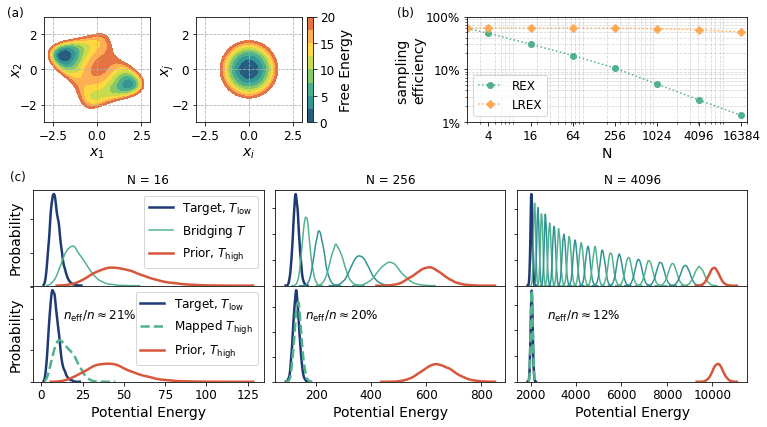

In [15]:
#all figures combined
fig = plt.figure(figsize=(2*6.4, 1.4*4.8))
gs = fig.add_gridspec(5, 2, wspace=0.55, hspace=3.5)

#-----------------------------------------------------------------------------------
gs_topleft = gs[:2,0].subgridspec(1,2, wspace=0.3)
axs = gs_topleft.subplots()

ax = axs[0]
levels = np.linspace(0,20,9)
ct = ax.contourf(X, Y, DoubleWell2D(X,Y), levels=levels)
ax.set_box_aspect(1)
ax.set_xlim(x_bins[0], x_bins[-1])
ax.set_ylim(y_bins[0], y_bins[-1])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', labelpad=-5)
ax.grid(linestyle='dashed')
ax.text(-0.35, 1.0, '(a)', transform=ax.transAxes, fontdict={'size': 12})

ax = axs[1]
ct = ax.contourf(X, Y, ExtraDims(X,Y), levels=levels)
ax.set_box_aspect(1)
ax.set_xlim(x_bins[0], x_bins[-1])
ax.set_ylim(y_bins[0], y_bins[-1])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel('$x_i$')
ax.set_ylabel('$x_j$', labelpad=-5)
ax.grid(linestyle='dashed')

cb = plt.colorbar(ct, ticks=levels[::2], ax=axs, pad=0.02, fraction=0.021)
cb.set_label('Free Energy')

#-----------------------------------------------------------------------------------
gs_topright = gs[:2,1].subgridspec(1,1)
ax = gs_topright.subplots()

ax.text(-0.25, 1.0, '(b)', transform=ax.transAxes, fontdict={'size': 12})
ax.plot(dims, 100*(1+eff_REX)/nrep_REX, 'o:', c='fessa2', label='REX')
ax.plot(dims, 100*(1+eff_LREX)/2, 'D:', c='fessa5', label='LREX')
ax.set_ylabel('sampling \nefficiency', labelpad=-0.3)
ax.set_ylim(1,100)
ax.set_xlim(xrange[0], xrange[-1])
ax.set_xlabel('N')
ax.set_xscale('log')
ax.set_xticks(dims[1:], dims[1:])
ax.set_yscale('log')
ax.set_yticks([1, 10, 100], ['1%', '10%', '100%'])

ax.grid(axis='x', which='minor', linestyle='dashed', alpha=0.5)
ax.grid(axis='y', which='both', linestyle='dashed', alpha=0.5)
ax.legend()

#-----------------------------------------------------------------------------------
gs_bottom = gs[2:,:].subgridspec(2, 3, wspace=0.05, hspace=0)
axs = gs_bottom.subplots(sharex=False, sharey=False)
axs[0,0].text(-0.1, 1.1, '(c)', transform=axs[0,0].transAxes, fontdict={'size': 12})
for i,dim in enumerate([2**4, 2**8, 2**12]):
    
    ax = axs[0,i]
    ax.set_title(f'N = {dim}')
    if i == 0:
        ax.set_ylabel('Probability')
    ene = np.load(f'../dw/DoubleWell{dim}-MDenergies.npy')
    grid = np.linspace(ene[0].min(), ene[0].max(), 100)
    ax.plot(grid, gaussian_kde(ene[0]).pdf(grid), color=f'fessa0', label='Target, $T_{\mathrm{low}}$', lw=2.5)
    grid = np.linspace(ene[1].min(), ene[1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[1]).pdf(grid), color=f'fessa2', label='Bridging $T$', lw=1.5, ls='-')
    for j in range(2, len(ene)-1):
        grid = np.linspace(ene[j].min(), ene[j].max(), 100)
        color = 'fessa1' if j % 2 == 0 else 'fessa2'
        ax.plot(grid, gaussian_kde(ene[j]).pdf(grid), color=color, lw=1.5, ls='-')
    grid = np.linspace(ene[-1].min(), ene[-1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[-1]).pdf(grid), color=f'fessa6', label='Prior, $T_{\mathrm{high}}$', lw=2.5)
    ax.set_ylim(0, None)
    ax.set_yticklabels([])
    if i == 0:
        ax.legend()
    
    ax = axs[1,i]
    if i == 0:
        ax.set_ylabel('Probability')
    ax.text(0.13, 0.65, r'$n_\mathrm{eff}/n \approx '+str(s_eff[i])+'\%$', transform=ax.transAxes, fontdict={'size': 12})
    ene = np.load(f'../dw/DoubleWell{dim}-NFenergies.npy')
    grid = np.linspace(ene[0].min(), ene[0].max(), 100)
    ax.plot(grid, gaussian_kde(ene[0]).pdf(grid), color=f'fessa0', label='Target, $T_{\mathrm{low}}$', lw=2.5)
    grid = np.linspace(ene[1].min(), ene[1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[1]).pdf(grid), color=f'fessa2', label='Mapped $T_{\mathrm{high}}$', lw=2.5, ls='--')
    grid = np.linspace(ene[-1].min(), ene[-1].max(), 100)
    ax.plot(grid, gaussian_kde(ene[-1]).pdf(grid), color=f'fessa6', label='Prior, $T_{\mathrm{high}}$', lw=2.5)
    ax.set_ylim(0, None)
    ax.set_yticklabels([])
    ax.set_xlabel('Potential Energy')
    if i == 0:
        ax.legend()

plt.savefig('DoubleWell-all.pdf', bbox_inches='tight')
plt.show()

## trajectory

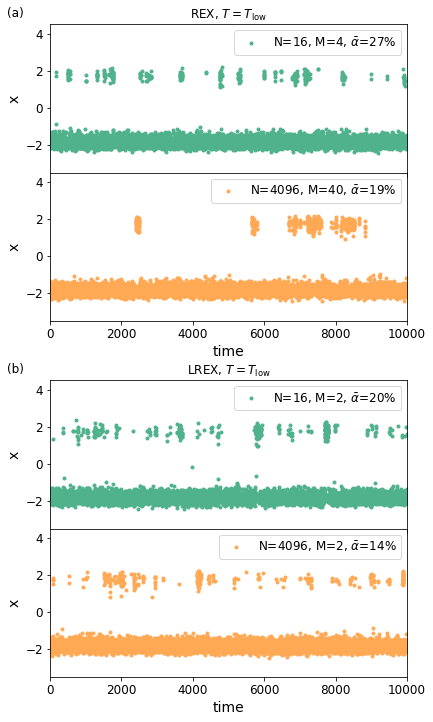

In [66]:
#to show one effect of long mixing time in REX
def plot_xtraj(ax, method, dim, nrep, acceptance, color):
    label = f'N={dim}, M={nrep}, $\\bar{{\\alpha}}$={acceptance}%'
    data = np.load(f'../dw/dw-{method}-N{dim}.npy')
    ax.plot(data, '.', c=color, label=label, rasterized=True)
    ax.set_xlabel('time')
    ax.set_xlim(0, len(data))
    ax.set_ylabel('x')
    ax.set_ylim(-3.5, 4.5)
    ax.legend()
    
dim = [16, 4096]
color = ['fessa2', 'fessa5']
tag_pos = [-0.12, 1.05]
fig = plt.figure(figsize=(6.4, 2.5*4.8))
gs = fig.add_gridspec(2, 1)

method = 'REX'
nrep = [4, 40]
acceptance = [27, 19]

sub_gs = gs[0].subgridspec(2, 1, hspace=0)
axs = sub_gs.subplots(sharex=True, sharey=True)
axs[0].set_title(method+', $T=T_{\mathrm{low}}$')
axs[0].text(*tag_pos, '(a)', transform=axs[0].transAxes, fontdict={'size': 12})

info = [axs, 2*[method], dim, nrep, acceptance, color]
plot_xtraj(*[item[0] for item in info])
plot_xtraj(*[item[1] for item in info])


method = 'LREX'
nrep = [2, 2]
acceptance = [20, 14]

sub_gs = gs[1].subgridspec(2, 1, hspace=0)
axs = sub_gs.subplots(sharex=True, sharey=True)
axs[0].set_title(method+', $T=T_{\mathrm{low}}$')
axs[0].text(*tag_pos, '(b)', transform=axs[0].transAxes, fontdict={'size': 12})

info = [axs, 2*[method], dim, nrep, acceptance, color]
plot_xtraj(*[item[0] for item in info])
plot_xtraj(*[item[1] for item in info])

plt.savefig('DoubleWell-xtraj.pdf', bbox_inches='tight')
plt.show()